In [33]:
import torch
import numpy as np
import torch.nn as nn
from sklearn import datasets
import matplotlib.pyplot as plt

In [10]:
x_numpy, y_numpy = datasets.make_regression(n_samples = 100, n_features = 1, noise = 20, random_state = 1)

# print(x_numpy.size)
# print(x_numpy.shape)
# print(y_numpy)

In [17]:
x_features = torch.from_numpy(x_numpy.astype(np.float32))
y_labels = torch.from_numpy(y_numpy.astype(np.float32))

In [35]:
# y_labels = y_labels.reshape(-1, 1)
#                  OR
y_labels = y_labels.view(y_labels.shape[0], 1)
# print(y_labels.shape)

torch.Size([100, 1])


In [21]:
n_samples, n_features = x_features.shape

# print(n_samples)
# print(n_features)

In [24]:
class LinearRegression(nn.Module):
  def __init__(self, input_dim, output_dim):
    super(LinearRegression, self).__init__()
    self.lin = nn.Linear(input_dim, output_dim)

  def forward(self, x):
    return self.lin(x)

input_shape = n_features
output_shape = 1

model = LinearRegression(input_shape, output_shape)

In [27]:
learning_rate = 1e-2
loss_function = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

In [32]:
epochs = 100
for epoch in range(epochs):
  y_predicted = model(x_features)
  loss = loss_function(y_predicted, y_labels)
  loss.backward()
  optimizer.step()
  optimizer.zero_grad()

  if (epoch+1) % 10 == 0:
    print(f'epoch {epoch + 1}, loss : {loss.item() : .4f}')

epoch 10, loss :  0.8457
epoch 20, loss :  0.8419
epoch 30, loss :  0.8391
epoch 40, loss :  0.8370
epoch 50, loss :  0.8355
epoch 60, loss :  0.8344
epoch 70, loss :  0.8336
epoch 80, loss :  0.8330
epoch 90, loss :  0.8326
epoch 100, loss :  0.8323


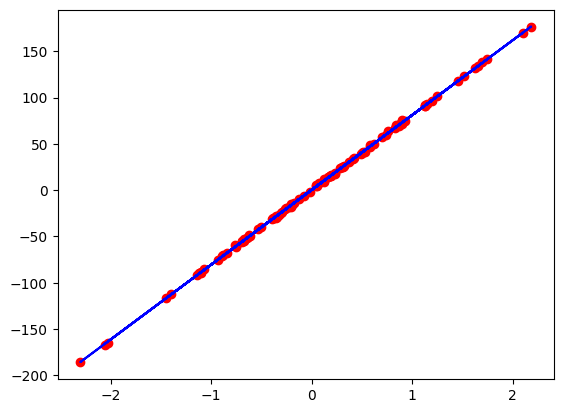

In [34]:
predicted = model(x_features).detach().numpy()
plt.plot(x_numpy, y_numpy, 'ro')
plt.plot(x_numpy, predicted, 'b')
plt.show()